# Titanic Disaster Prediction

Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City.
Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time the deadliest of a single ship in the West and the deadliest peacetime sinking of a superliner or cruise ship to date.

In my first project, we will discuss the Titanic dataset, which is the most basic project of kaggle, for data analysis on this subject. Our goal is to build a machine learning model that predicts whether the passengers on board were killed in the crash.

We will follow the general roadmap in data analysis processes:
- We will look over the dataset and try to get a basic idea.
- We will use visualizations for this.
- Then, We will look for relationship between variables via statistical calculations. We will make changes to the data if necessary.
- We will examine missing and contradictory observations and make the necessary preliminary processes before modeling.
- Finally, I will fit my model and end my project..

First of all, we import numpy and pandas libraries for operations. Plus, seaborn and matplotlib libraries for visualizations.

In [153]:
# Data Analysis
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

Dataset have already separated. I copied them.

In [70]:
a_df = pd.read_csv("train.csv")
a_df_t = pd.read_csv("test.csv")

In [71]:
df = a_df.copy()
df_t = a_df_t.copy()

### Exploring Data

In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Our dataset consists of 12 columns.
* Survived : Survival (1 = Yes, 0 = No)
* Sex : Gender
* Embarked: Port of Embarkation
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

 While Survived, Sex an Embarked nominal categorical, Pclass ordinal categorical variable.
* Age : Age in years
* Fare: Passenger fare
* SibSp: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic

Pclass is ordinal, Age and Fare are numerical variables.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We visualize the missing observations based on column and index, it turns out that only 20% of the data in the cabin data. More than 20% data appears to be missing in the Age variable.

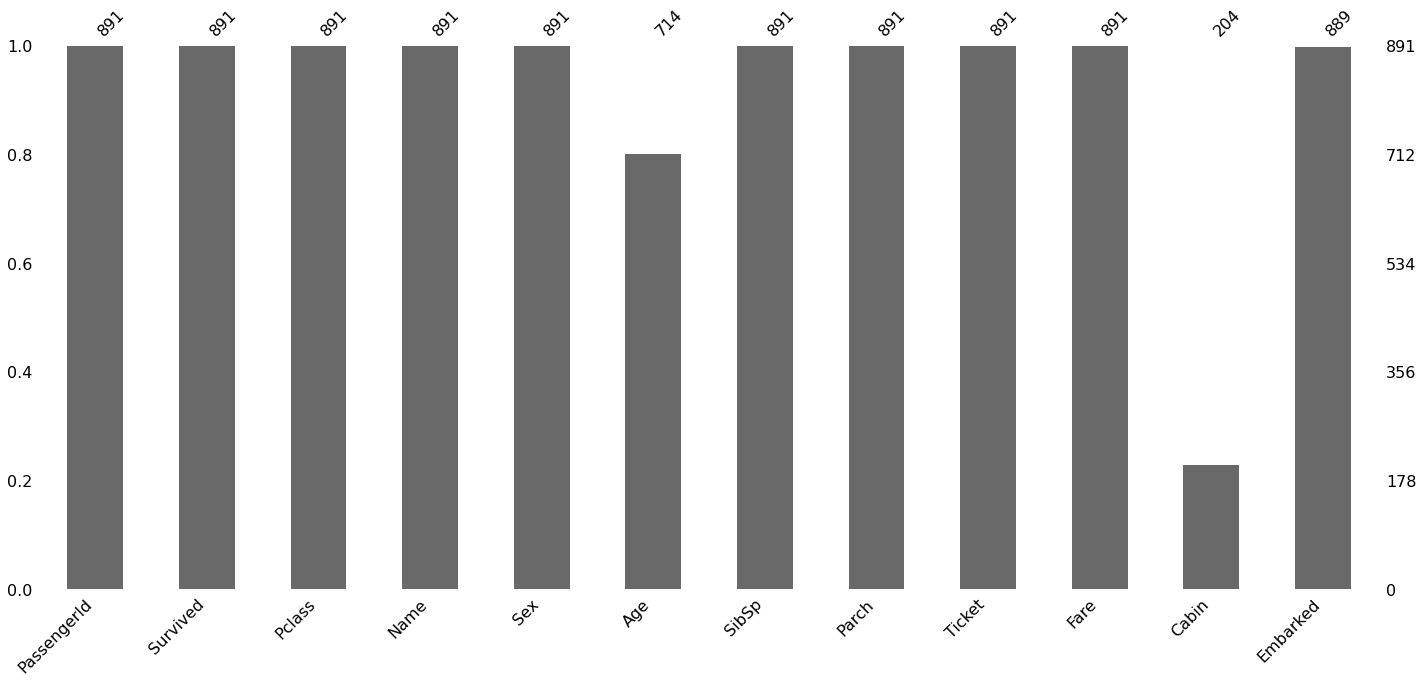

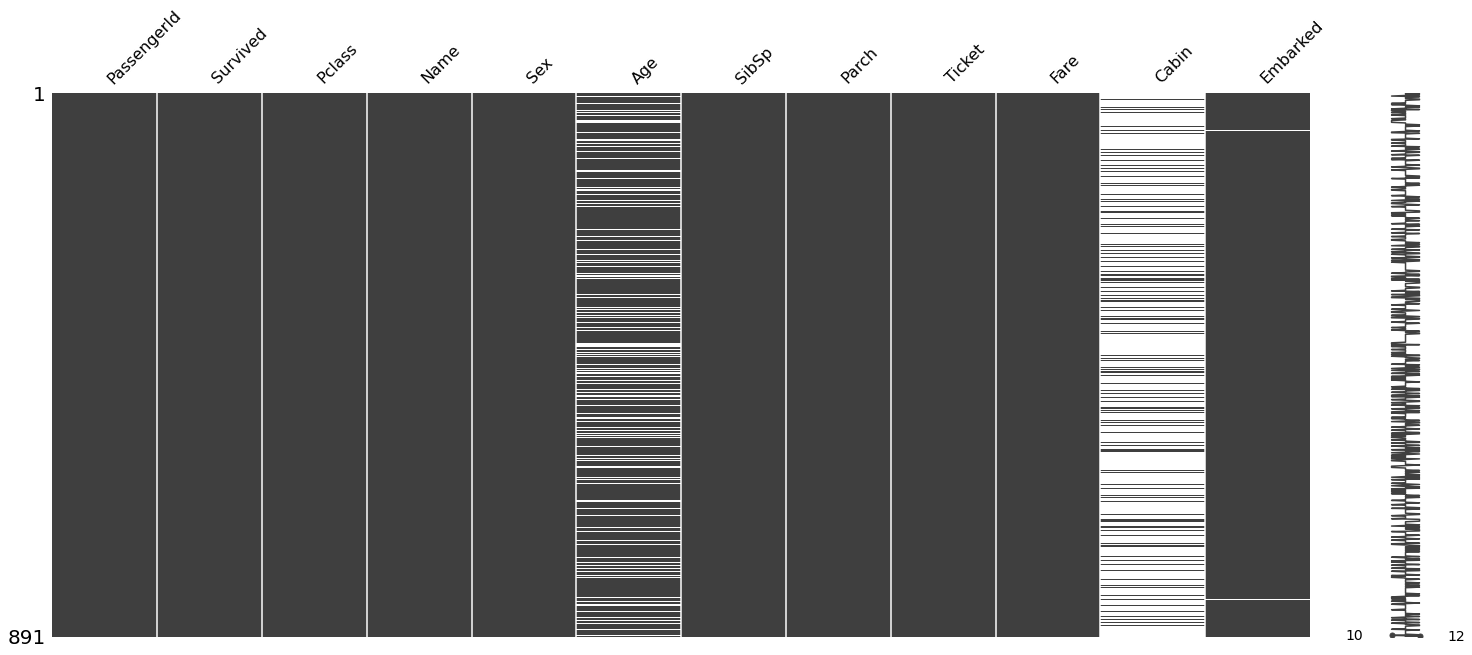

In [74]:
msno.bar(df);
msno.matrix(df);

I will use the PassengerId column instead of the name variable. I remove the Name, Ticket and Cabin columns from our data sets that are not meaningful to us.

In [75]:
del df["Name"]
del df["Ticket"]
del df["Cabin"]

We do the same for the test part.

In [76]:
del df_t["Name"]
del df_t["Ticket"]
del df_t["Cabin"]

We change the indexes of the data sets to the PassengerId column.

In [77]:
df.index=df["PassengerId"]

In [78]:
del df["PassengerId"]

In [79]:
df_t.index=df_t["PassengerId"]

In [80]:
del df_t["PassengerId"]

In [81]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [82]:
df_t.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [83]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The average age of the passengers in our data set is 29.69 and We see that the oldest passenger is 80 years old. It is remarkable that the standard deviation in wages is greater than the average. Median is 14.45, 75% quartile is 31, but the maximum cost is 512, which shows us that there are discrete values in the Fare variable.

If we use heatmap for look at the correlation matrix between variables; We can see that the correlation between the travel class and the variables of survival, fare and age is higher than the others. When Pclass variable increase to 1, 2 and 3, quality of the class is decrease. The cause of negative correlation with the other variables that higher class variable is the lower quality of class.

### Visualization

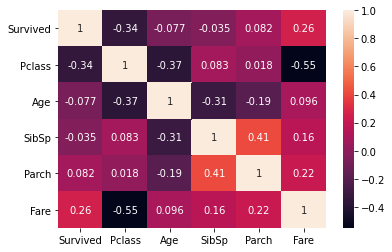

In [84]:
sns.heatmap(df.corr(), annot=True)
plt.show()

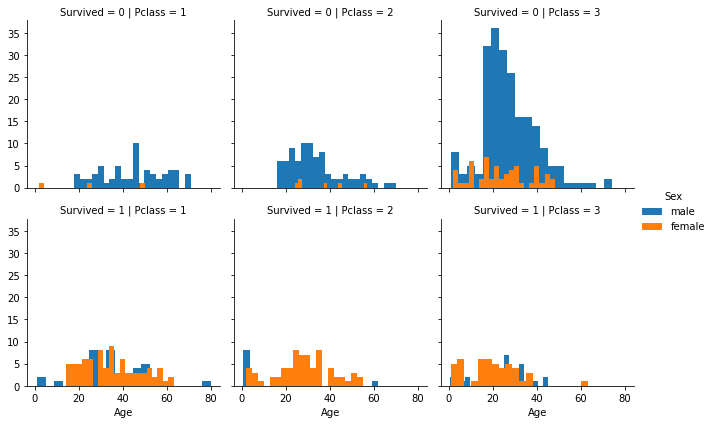

In [85]:
grid = sns.FacetGrid(df, col='Pclass',hue="Sex", row='Survived')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

In the third graphs, we observe most of those who lost their lives to third class male passengers between the ages of 20 and 40.

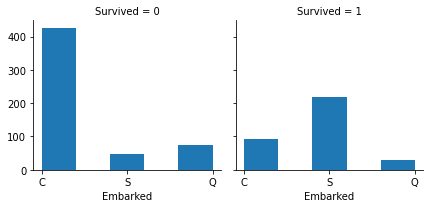

In [86]:
grid = sns.FacetGrid(df,col='Survived')
grid.map(plt.hist,'Embarked',bins=5)
grid.add_legend();

We see that the majority of those who lost their lives in the accident came from the port of C: (Cherbourg)

### Data Preprocessing

Before we can build our model, we need to adapt our dataset. For this, we need to convert strings to numerical data. We start with the variable of gender.

In [87]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()

In [88]:
lbe.fit_transform(df["Sex"])

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [89]:
df["new_sex"]=lbe.fit_transform(df["Sex"])

In [90]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,new_sex
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1
2,1,1,female,38.0,1,0,71.2833,C,0
3,1,3,female,26.0,0,0,7.9250,S,0
4,1,1,female,35.0,1,0,53.1000,S,0
5,0,3,male,35.0,0,0,8.0500,S,1


In [91]:
del df["Sex"]

In [92]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,new_sex
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,1
2,1,1,38.0,1,0,71.2833,C,0
3,1,3,26.0,0,0,7.9250,S,0
4,1,1,35.0,1,0,53.1000,S,0
5,0,3,35.0,0,0,8.0500,S,1


In [93]:
df = df.rename(columns={"new_sex":"Sex"})

In [94]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,1
2,1,1,38.0,1,0,71.2833,C,0
3,1,3,26.0,0,0,7.9250,S,0
4,1,1,35.0,1,0,53.1000,S,0
5,0,3,35.0,0,0,8.0500,S,1


We set male status as 1 and female status as 0. Our gender variable has now become a numerical variable. We do the same for the test dataset.

In [95]:
lbe.fit_transform(df_t["Sex"])
df_t["new_sex"]=lbe.fit_transform(df_t["Sex"])
del df_t["Sex"]
df_t = df_t.rename(columns={"new_sex":"Sex"})

In [96]:
df_t.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
PassengerId,,,,,,,
892,3,34.5,0,0,7.8292,Q,1
893,3,47.0,1,0,7.0000,S,0
894,2,62.0,0,0,9.6875,Q,1
895,3,27.0,0,0,8.6625,S,1
896,3,22.0,1,1,12.2875,S,0


### Estimation of Missing Data

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Sex       891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 59.2+ KB


We see that Age column has 177 missing values. I will use k-nearest neighbors algorithm to estimate those

In [98]:
from ycimpute.imputer import knnimput

We get only numeric columns from the data set.

In [99]:
e_df= df.select_dtypes(include=["float64","int64"])
print(e_df.head())
e_df.isnull().sum()

             Survived  Pclass   Age  SibSp  Parch     Fare
PassengerId                                               
1                   0       3  22.0      1      0   7.2500
2                   1       1  38.0      1      0  71.2833
3                   1       3  26.0      0      0   7.9250
4                   1       1  35.0      1      0  53.1000
5                   0       3  35.0      0      0   8.0500


Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

Since the algorithm works on arrays, we first convert it to numpy array. We need to save the title names as we will combine them later.

In [100]:
var_names=list(e_df)

In [101]:
n_df = np.array(e_df)

In [102]:
n_df.shape

(891, 6)

We run the algorithm.

In [103]:
dff=knnimput.KNN(k=4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.152
Imputing row 101/891 with 0 missing, elapsed time: 0.154
Imputing row 201/891 with 0 missing, elapsed time: 0.155
Imputing row 301/891 with 1 missing, elapsed time: 0.156
Imputing row 401/891 with 0 missing, elapsed time: 0.158
Imputing row 501/891 with 0 missing, elapsed time: 0.159
Imputing row 601/891 with 0 missing, elapsed time: 0.161
Imputing row 701/891 with 0 missing, elapsed time: 0.163
Imputing row 801/891 with 0 missing, elapsed time: 0.164


After that, we convert it to dataframe and synchronize it to the main train set.

In [104]:
dff = pd.DataFrame(dff,columns=var_names)

In [105]:
dff.index=df.index

In [106]:
df["Age"]=dff["Age"]

In [107]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Sex         0
dtype: int64

We do the same for the test dataset.

In [108]:
e_df_t= df_t.select_dtypes(include=["float64","int64"])
print(e_df_t.head())
e_df_t.isnull().sum()

             Pclass   Age  SibSp  Parch     Fare
PassengerId                                     
892               3  34.5      0      0   7.8292
893               3  47.0      1      0   7.0000
894               2  62.0      0      0   9.6875
895               3  27.0      0      0   8.6625
896               3  22.0      1      1  12.2875


Pclass     0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

In [109]:
var_names=list(e_df_t)

In [110]:
n_df_t = np.array(e_df_t)

In [111]:
dff_t=knnimput.KNN(k=4).complete(n_df_t)

Imputing row 1/418 with 0 missing, elapsed time: 0.040
Imputing row 101/418 with 0 missing, elapsed time: 0.042
Imputing row 201/418 with 1 missing, elapsed time: 0.043
Imputing row 301/418 with 0 missing, elapsed time: 0.045
Imputing row 401/418 with 0 missing, elapsed time: 0.046


In [112]:
dff_t = pd.DataFrame(dff_t,columns=var_names)

In [113]:
dff_t.index=df_t.index

In [114]:
df_t["Age"]=dff_t["Age"]

In [115]:
df_t["Fare"]=dff_t["Fare"]

In [116]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Sex         0
dtype: int64

Since the values in the embarked column are missing, we delete these indexes.

In [117]:
df["Embarked"].isnull().index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [118]:
df[df.isnull().any(axis=1)]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
PassengerId,,,,,,,,
62,1,1,38.0,0,0,80.0,NaN,0
830,1,1,62.0,0,0,80.0,NaN,0


In [119]:
df=df.drop(index=62)
df=df.drop(index=830)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
 7   Sex       889 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 59.0+ KB


Since the embarked column also contains a string, we need to convert it to a numeric expression as well.

In [121]:
lbe.fit_transform(df["Embarked"])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,

This is a remarkeble point, because when we do one-hot encoding we can fall into dummy variable trap. To avoid this, there should be no more columns than the number of converted variable. So we made one-hot encoding the Embarked column by avoiding the dummy variable trap. We do the same for the test set.

In [122]:
df_one_hot=pd.get_dummies(df,columns=["Embarked"],prefix=["Emb"])

In [123]:
df_one_hot.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Emb_C,Emb_Q,Emb_S
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,0,1
2,1,1,38.0,1,0,71.2833,0,1,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,0,1


In [124]:
df=df_one_hot

In [125]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Emb_C,Emb_Q,Emb_S
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,0,1
2,1,1,38.0,1,0,71.2833,0,1,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,0,1


In [126]:
df_t.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
PassengerId,,,,,,,
892,3,34.5,0,0,7.8292,Q,1
893,3,47.0,1,0,7.0000,S,0
894,2,62.0,0,0,9.6875,Q,1
895,3,27.0,0,0,8.6625,S,1
896,3,22.0,1,1,12.2875,S,0


In [127]:
lbe.fit_transform(df_t["Embarked"])

array([1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2,
       0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2,

In [128]:
df_t_one_hot=pd.get_dummies(df_t,columns=["Embarked"],prefix=["Emb"])

In [129]:
df_t_one_hot.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Emb_C,Emb_Q,Emb_S
PassengerId,,,,,,,,,
892,3,34.5,0,0,7.8292,1,0,1,0
893,3,47.0,1,0,7.0000,0,0,0,1
894,2,62.0,0,0,9.6875,1,0,1,0
895,3,27.0,0,0,8.6625,1,0,0,1
896,3,22.0,1,1,12.2875,0,0,0,1


In [130]:
df_t=df_t_one_hot

In [131]:
df_t.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Emb_C,Emb_Q,Emb_S
PassengerId,,,,,,,,,
892,3,34.5,0,0,7.8292,1,0,1,0
893,3,47.0,1,0,7.0000,0,0,0,1
894,2,62.0,0,0,9.6875,1,0,1,0
895,3,27.0,0,0,8.6625,1,0,0,1
896,3,22.0,1,1,12.2875,0,0,0,1


We also apply one-hot encoding to the pclass column.

In [132]:
lbe.fit_transform(df["Pclass"])

array([2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1, 2,
       1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2,
       1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2, 2,

In [133]:
df_one_hot=pd.get_dummies(df,columns=["Pclass"],prefix=["cls"])

In [134]:
df_one_hot.head()

,Survived,Age,SibSp,Parch,Fare,Sex,Emb_C,Emb_Q,Emb_S,cls_1,cls_2,cls_3
PassengerId,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,1,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,0,1,0,0,1,0,0
3,1,26.0,0,0,7.9250,0,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,1,1,0,0
5,0,35.0,0,0,8.0500,1,0,0,1,0,0,1


In [135]:
df = df_one_hot

In [136]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex,Emb_C,Emb_Q,Emb_S,cls_1,cls_2,cls_3
PassengerId,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,1,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,0,1,0,0,1,0,0
3,1,26.0,0,0,7.9250,0,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,1,1,0,0
5,0,35.0,0,0,8.0500,1,0,0,1,0,0,1


In [137]:
lbe.fit_transform(df_t["Pclass"])

array([2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1,
       0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 0, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1,
       1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2,
       1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1,
       0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2,

The one-hot encoding will be done for the test dataset.

In [138]:
df_t_one_hot = pd.get_dummies(df_t,columns=["Pclass"],prefix=["cls"])

In [139]:
df_t_one_hot.head()

,Age,SibSp,Parch,Fare,Sex,Emb_C,Emb_Q,Emb_S,cls_1,cls_2,cls_3
PassengerId,,,,,,,,,,,
892,34.5,0,0,7.8292,1,0,1,0,0,0,1
893,47.0,1,0,7.0000,0,0,0,1,0,0,1
894,62.0,0,0,9.6875,1,0,1,0,0,1,0
895,27.0,0,0,8.6625,1,0,0,1,0,0,1
896,22.0,1,1,12.2875,0,0,0,1,0,0,1


In [140]:
df_t = df_t_one_hot

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Age       889 non-null    float64
 2   SibSp     889 non-null    int64  
 3   Parch     889 non-null    int64  
 4   Fare      889 non-null    float64
 5   Sex       889 non-null    int32  
 6   Emb_C     889 non-null    uint8  
 7   Emb_Q     889 non-null    uint8  
 8   Emb_S     889 non-null    uint8  
 9   cls_1     889 non-null    uint8  
 10  cls_2     889 non-null    uint8  
 11  cls_3     889 non-null    uint8  
dtypes: float64(2), int32(1), int64(3), uint8(6)
memory usage: 50.4 KB


In [142]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   SibSp   418 non-null    int64  
 2   Parch   418 non-null    int64  
 3   Fare    418 non-null    float64
 4   Sex     418 non-null    int32  
 5   Emb_C   418 non-null    uint8  
 6   Emb_Q   418 non-null    uint8  
 7   Emb_S   418 non-null    uint8  
 8   cls_1   418 non-null    uint8  
 9   cls_2   418 non-null    uint8  
 10  cls_3   418 non-null    uint8  
dtypes: float64(2), int32(1), int64(2), uint8(6)
memory usage: 20.4 KB


### Modelling

In [143]:
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from xgboost import XGBClassifier
from warnings import filterwarnings
filterwarnings ('ignore')

In [144]:
y_train = df["Survived"]
X_train = df.drop(["Survived"],axis=1)
X_test = df_t

We will use XGBoost algorithm

In [145]:
xgb_model = XGBClassifier().fit(X_train,y_train)

[18:33:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [146]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [147]:
xgb_params={'n_estimators':[100,500,1000,2000],
            'subsample':[0.6,0.8,1.0],
            'max_depth':[3,4,5,6],
            'learning_rate':[0.1,0.01,0.02,0.05],
            "min_samples_split":[2,5,10]}

In [148]:
xgb = XGBClassifier()
xgb_cv_model = GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=5)

We use cross validation with GridSearch and find the best parameters of the model.

In [149]:
xgb_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | ela

[19:23:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:23:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_job...,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [150]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 6,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [151]:
xgb = XGBClassifier(learning_rate=0.05,
                    max_depth=6,
                    min_samples_split=2,
                    n_estimators=100,
                    subsample=1.0)

In [152]:
xgb_tuned = xgb.fit(X_train,y_train)

[19:36:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Kaggle score: 0.78468